In [4]:
import numpy as np
import skfuzzy as fuzzy
from skfuzzy import control as ctrl

In [3]:
from thefuzz import fuzz
import skfuzzy as fuzz

/usr/local/lib/python3.7/dist-packages/thefuzz/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [1]:
pip install thefuzz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 993 kB 8.4 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=cc4534a0ad7023d1db82026a8e9ed44ffe45753ba8ba4f9e74cc32f414e1d284
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


In [5]:
permintaan = ctrl.Antecedent(np.arange(0, 3100, 1), 'Permintaan Barang')
persediaan = ctrl.Antecedent(np.arange(0, 256, 1), 'Persediaan Barang')
produksi = ctrl.Consequent(np.arange(0, 3600, 1), 'Produksi Barang')

In [10]:
permintaan['turun'] = fuzz.trapmf(permintaan.universe, [0, 0, 400, 3000])
permintaan['naik'] = fuzz.trimf(permintaan.universe, [400, 3000, 3000])

In [12]:
persediaan['sedikit'] = fuzz.trapmf(persediaan.universe, [0, 0, 50, 250])
persediaan['banyak'] = fuzz.trimf(persediaan.universe, [50, 250, 250])

In [16]:
produksi['berkurang'] = fuzz.trapmf(produksi.universe, [0, 0, 700, 3500])
produksi['bertambah'] = fuzz.trimf(produksi.universe, [700, 3500, 3500])

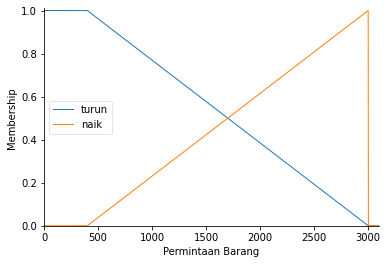

In [11]:
permintaan.view()

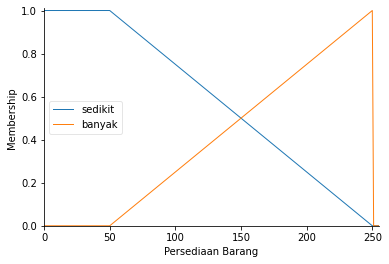

In [13]:
persediaan.view()

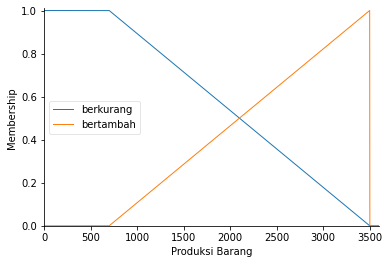

In [17]:
produksi.view()

In [18]:
rule1 = ctrl.Rule(permintaan['turun'] & persediaan['banyak'], produksi['berkurang'])
rule2 = ctrl.Rule(permintaan['turun'] & persediaan['sedikit'], produksi['berkurang'])
rule3 = ctrl.Rule(permintaan['naik'] & persediaan['banyak'], produksi['bertambah'])
rule4 = ctrl.Rule(permintaan['naik'] & persediaan['sedikit'], produksi['bertambah'])

In [19]:
produksi_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4])

In [20]:
produksi_barang = ctrl.ControlSystemSimulation(produksi_ctrl)

In [26]:
produksi_barang.input['Permintaan Barang'] = 3000
produksi_barang.input['Persediaan Barang'] = 120
produksi_barang.compute()

2482.338888888861


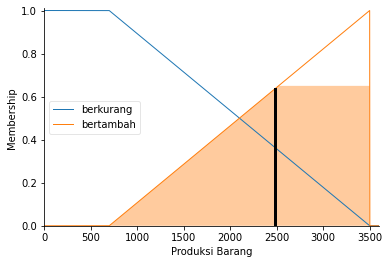

In [27]:
print(produksi_barang.output['Produksi Barang'])
produksi.view(sim=produksi_barang)